In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
#generate mesh grid
m = 100
n  = 10
x = np.linspace(0,100,m)
y = np.linspace(0,1,n)
X,Y = np.meshgrid(x,y)
U = np.zeros((m,n)) #velocity in x direction
V = np.zeros((m,n)) #velocity in y direction
t = 1000
Vtrans = np.zeros((t, n))
Utrans = np.zeros((t, n))
dp_dx = -1 #constant pressure gradient in x direction

In [3]:
#solve the equations
dt = 0.0001
dx = x[1] - x[0]
dy = y[1]-y[0]
for i in range(t):
    tempx = deepcopy(U)
    tempy = deepcopy(V)
    tempx[:,1:-1] = U[:,1:-1] + i*dt*((U[:,0:-2] + U[:,2:] - 2*U[:,1:-1])/dx**2 - dp_dx)
    tempy[1:-1,1:5] = -((tempx[1:-1, 1:5] - U[1:-1, 1:5])*(-dx/dy) + tempy[1:-1,1:5])
    Utrans[i,:] = tempx[1,:]
    tempy[1:-1, 8:4:-1] = -tempy[1:-1, 1:5]
    Vtrans[i,:] = tempy[1,:]
    U = deepcopy(tempx)
    V = deepcopy(tempy)

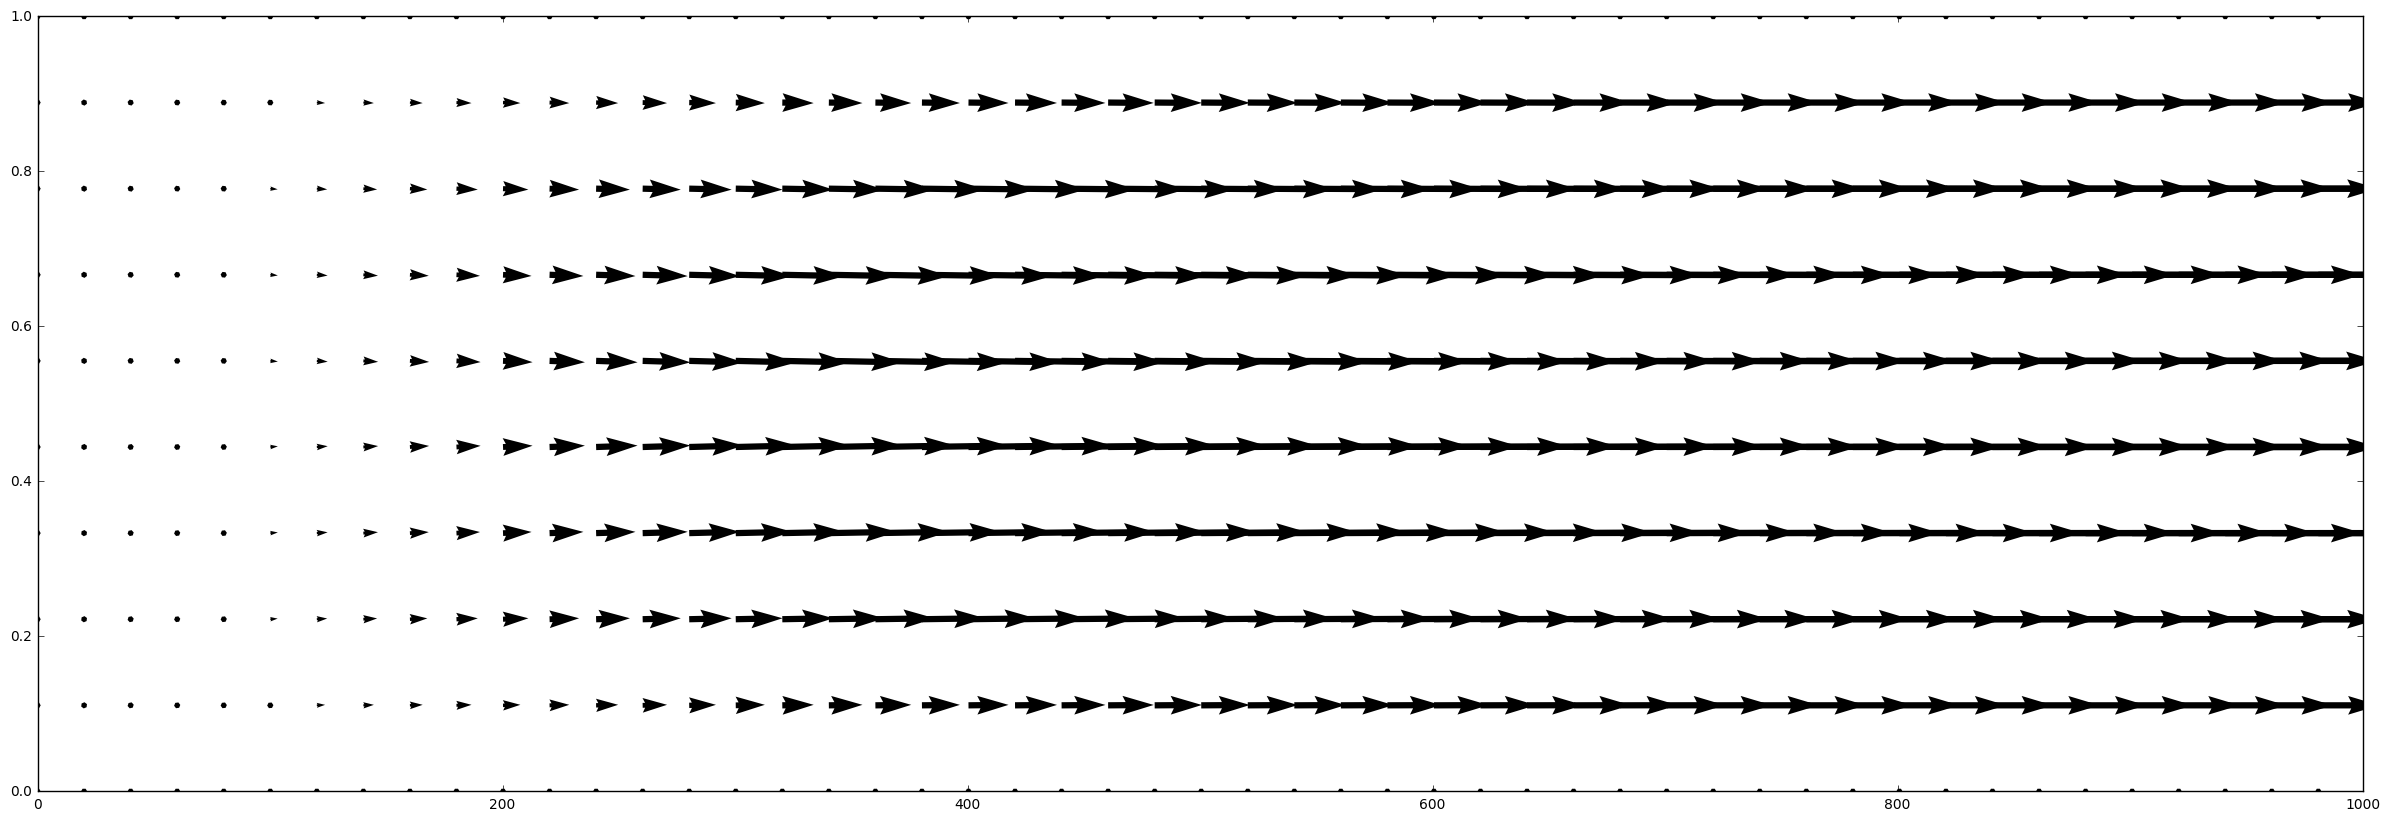

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(30,10))
xt = np.linspace(0,t, t)
yt = np.linspace(0,1,10)
Xt, Yt = np.meshgrid(xt, yt)
Q = plt.quiver(Xt[:, ::20], Yt[:, ::20], Utrans.T[:, ::20], Vtrans.T[:, ::20])